### **Importing Libraries**

In [89]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### **Importing Dataset**

In [90]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

### **Data Visualization**

In [91]:
X_train.shape

(50000, 32, 32, 3)

In [92]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [93]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [95]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [94]:
def plot_image(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

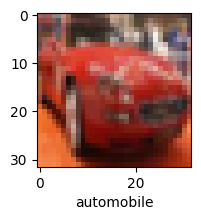

In [96]:
plot_image(X_train, y_train, 5)

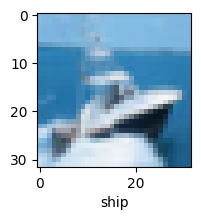

In [97]:
plot_image(X_train, y_train, 8)

In [98]:
X_train = X_train / 255
X_test = X_test / 255

### **Building CNN Model**

In [99]:
cnn = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense layers
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [100]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [87]:
cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 50s 32ms/step - loss: 0.4107 - accuracy: 0.8521
Epoch 2/30
1563/1563 [==============================] - 49s 31ms/step - loss: 0.3998 - accuracy: 0.8569
Epoch 3/30
1563/1563 [==============================] - 50s 32ms/step - loss: 0.3959 - accuracy: 0.8577
Epoch 4/30
1563/1563 [==============================] - 50s 32ms/step - loss: 0.3825 - accuracy: 0.8635
Epoch 5/30
1563/1563 [==============================] - 50s 32ms/step - loss: 0.3744 - accuracy: 0.8660
Epoch 6/30
1563/1563 [==============================] - 49s 32ms/step - loss: 0.3645 - accuracy: 0.8679
Epoch 7/30
1563/1563 [==============================] - 49s 32ms/step - loss: 0.3540 - accuracy: 0.8726
Epoch 8/30
1563/1563 [==============================] - 51s 33ms/step - loss: 0.3440 - accuracy: 0.8763
Epoch 9/30
1563/1563 [==============================] - 50s 32ms/step - loss: 0.3413 - accuracy: 0.8770
Epoch 10/30
1563/1563 [==============================] - 50s 32m

In [101]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 2.3166 - accuracy: 0.0973


[2.3165597915649414, 0.09730000048875809]

### **Testing the model**

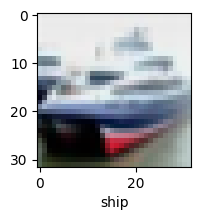

In [102]:
y_test = y_test.reshape(-1,)
plot_image(X_test, y_test, 1)

In [103]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[0.09825768, 0.11792458, 0.11020608, 0.08604657, 0.10646816,
        0.08771062, 0.1150746 , 0.09342404, 0.10633855, 0.07854903],
       [0.09540606, 0.13294737, 0.10723073, 0.08061844, 0.1069577 ,
        0.08608132, 0.12138464, 0.07973403, 0.11537109, 0.07426862],
       [0.09744278, 0.12531644, 0.10110676, 0.0824361 , 0.10867328,
        0.08742654, 0.12035998, 0.08270442, 0.11050926, 0.08402444],
       [0.09257424, 0.13000746, 0.10817382, 0.07819932, 0.11066274,
        0.09062888, 0.1182308 , 0.08622143, 0.10927826, 0.07602316],
       [0.10045652, 0.11408251, 0.10554922, 0.08704564, 0.10961864,
        0.08910551, 0.11196855, 0.08837306, 0.10920769, 0.08459248]],
      dtype=float32)

In [104]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 1, 1, 1, 1]

In [105]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

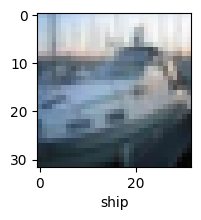

In [106]:
plot_image(X_test, y_test, 2)

In [107]:
classes[y_classes[2]]

'automobile'

### **Classification Report**

In [108]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
report = classification_report(y_test, y_classes)
print("Classification report: \n", report)

Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      0.76      0.18      1000
           2       0.09      0.00      0.01      1000
           3       0.00      0.00      0.00      1000
           4       0.10      0.01      0.02      1000
           5       0.00      0.00      0.00      1000
           6       0.09      0.19      0.13      1000
           7       0.00      0.00      0.00      1000
           8       0.03      0.01      0.01      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.04      0.10      0.03     10000
weighted avg       0.04      0.10      0.03     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
